## Redes Neurais Artificiais 2025.1

- **Disciplina**: Redes Neurais Artificiais 2025.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  

|Alunos                |Matrícula  |
|----------------------|-----------|
|Caio Bertoldo         |2215080050 |
|Danilo Jorge          |2215080007 |
|Diogo Gomes           |2215080033 |
|Guilherme Montenegro  |2215080011 |
|Leonardo Abinader     |2215080042 |
|Rodolfo Simões        |2215080073 |

### Explorando a base de dados: **_Air Quality and Pollution Assessment._**

Link da base de dados: https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment

In [42]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")

### Verifcando os dados

In [32]:
# Abrindo o dataset
df = pd.read_csv("datasets/updated_pollution_dataset.csv")

In [33]:
# Vendo os 5 primeiros exemplos
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [34]:
# Quantidade de exemplos
df.shape[0]

5000

In [35]:
# Vendo informações sobre o dataset (atributos e seus tipos de dado)
df.info(memory_usage=False, show_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Temperature                    float64
 1   Humidity                       float64
 2   PM2.5                          float64
 3   PM10                           float64
 4   NO2                            float64
 5   SO2                            float64
 6   CO                             float64
 7   Proximity_to_Industrial_Areas  float64
 8   Population_Density             int64  
 9   Air Quality                    object 
dtypes: float64(8), int64(1), object(1)

In [36]:
# Verifcando se há valores nulos
df.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [37]:
# Verificando se há dados duplicados
df.duplicated().sum()

np.int64(0)

In [38]:
# Vendo o atributo alvo
df['Air Quality'].value_counts()

Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

### Visualizando os dados

In [19]:
# Configuração visual
sns.set(style="white")
plt.rcParams["figure.figsize"] = (10, 6)

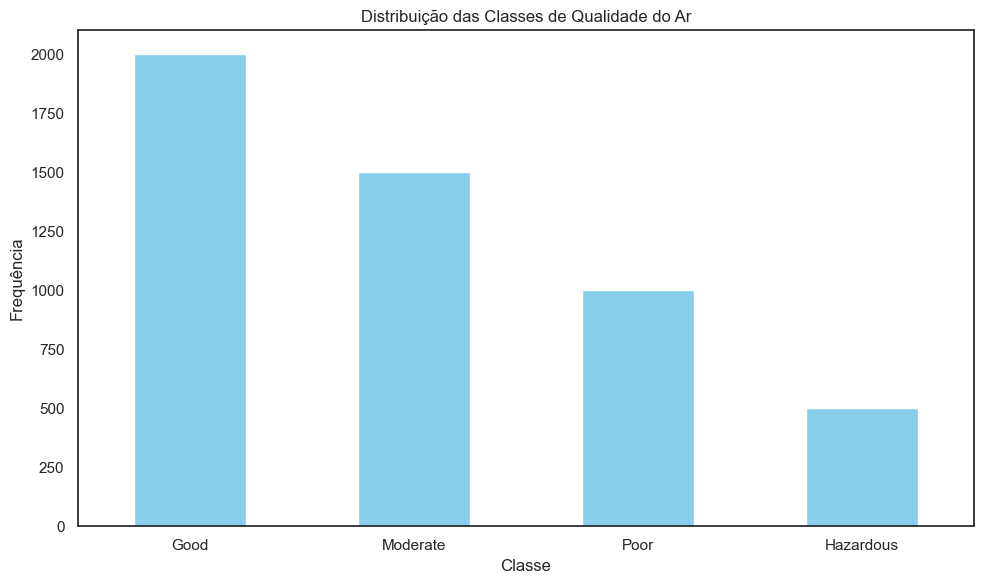

In [26]:
# Ver distribuição da variável alvo
df['Air Quality'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribuição das Classes de Qualidade do Ar")
plt.xlabel("Classe")
plt.ylabel("Frequência")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

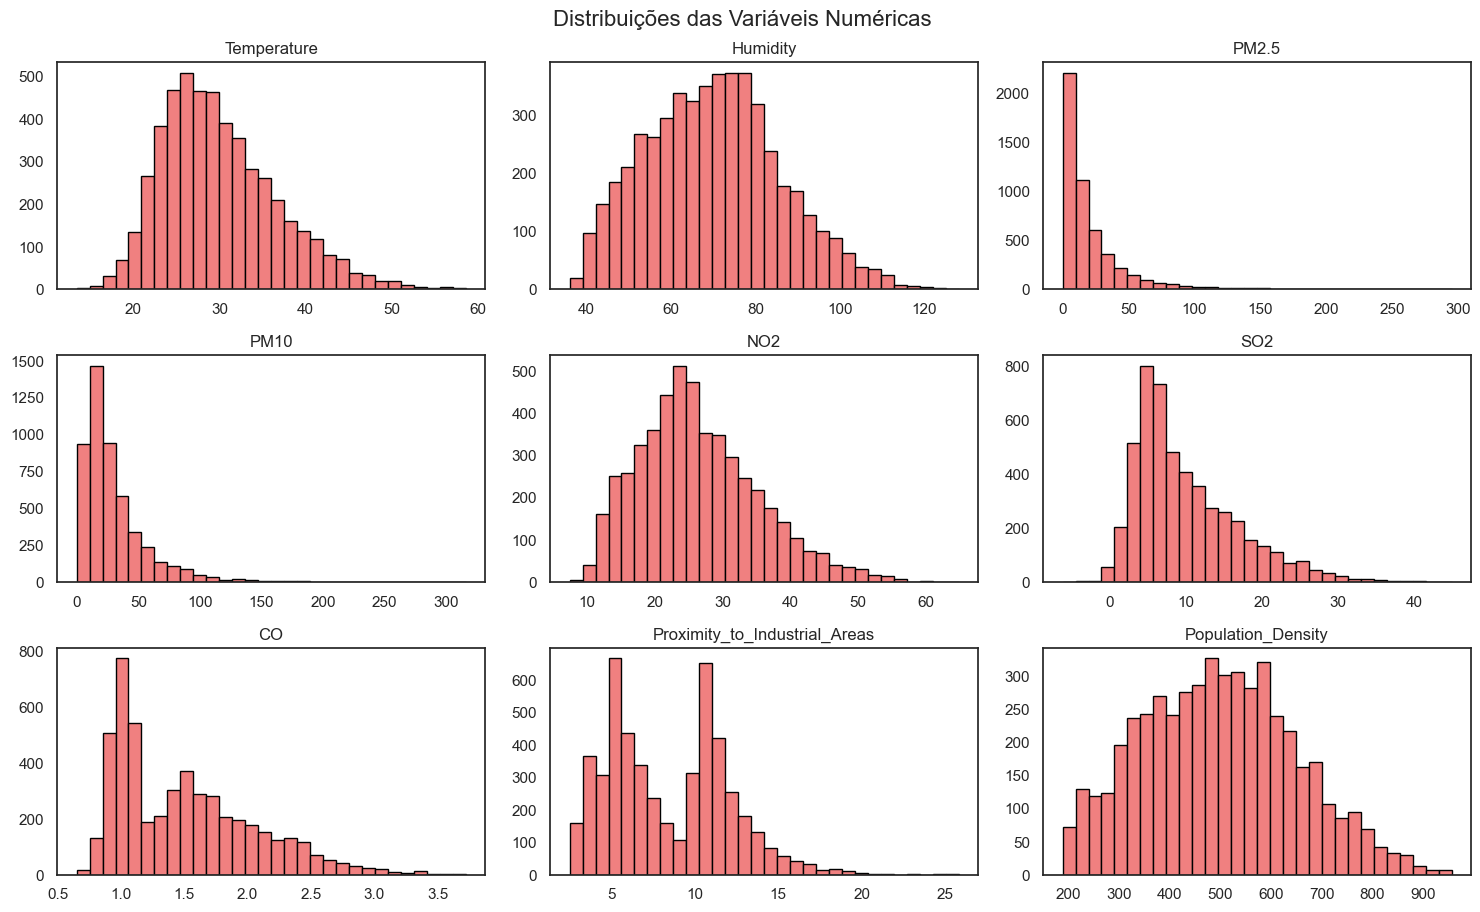

In [25]:
# Histogramas das variáveis numéricas
numeric_cols = df.select_dtypes(include='number').columns

df[numeric_cols].hist(bins=30, figsize=(15, 12), layout=(4, 3), color='lightcoral', edgecolor='black', grid=False)
plt.suptitle("Distribuições das Variáveis Numéricas", fontsize=16)
plt.tight_layout()
plt.show()

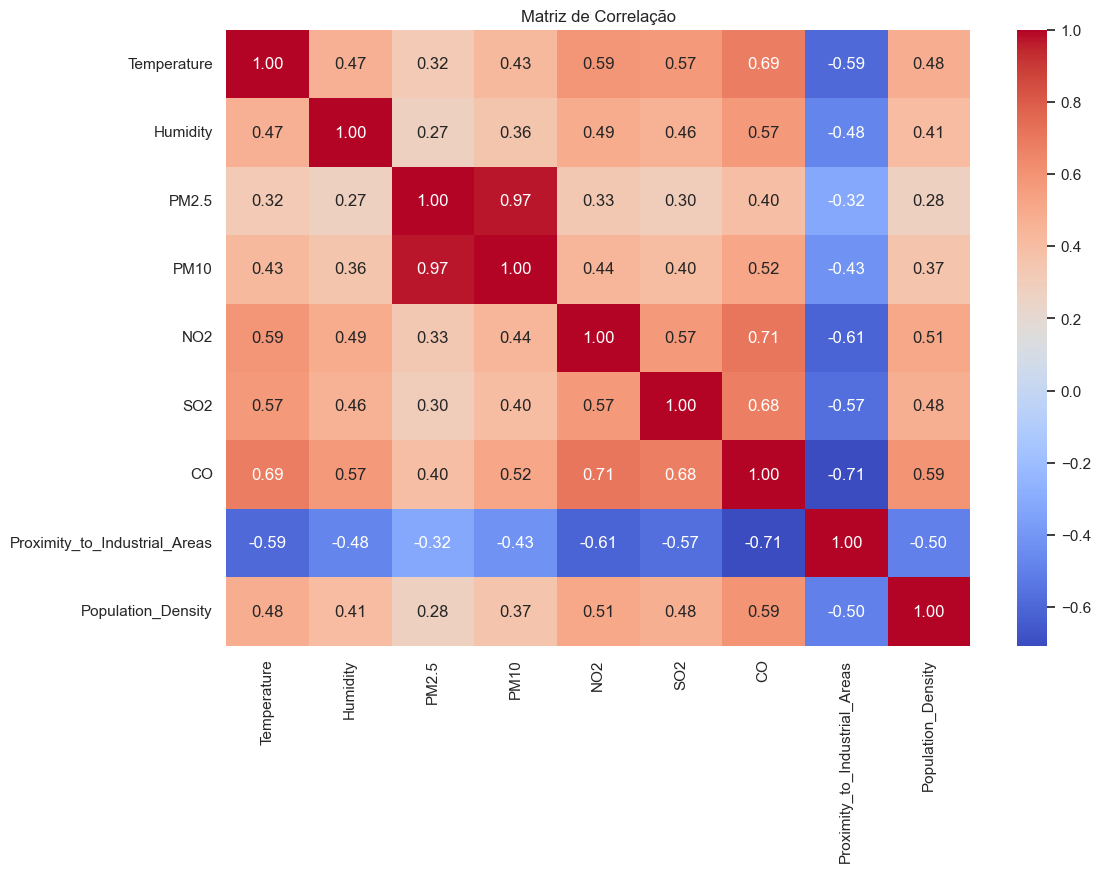

In [22]:
# Matriz de correlação
plt.figure(figsize=(12, 8))
correlation_matrix = df.drop(columns=['Air Quality']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

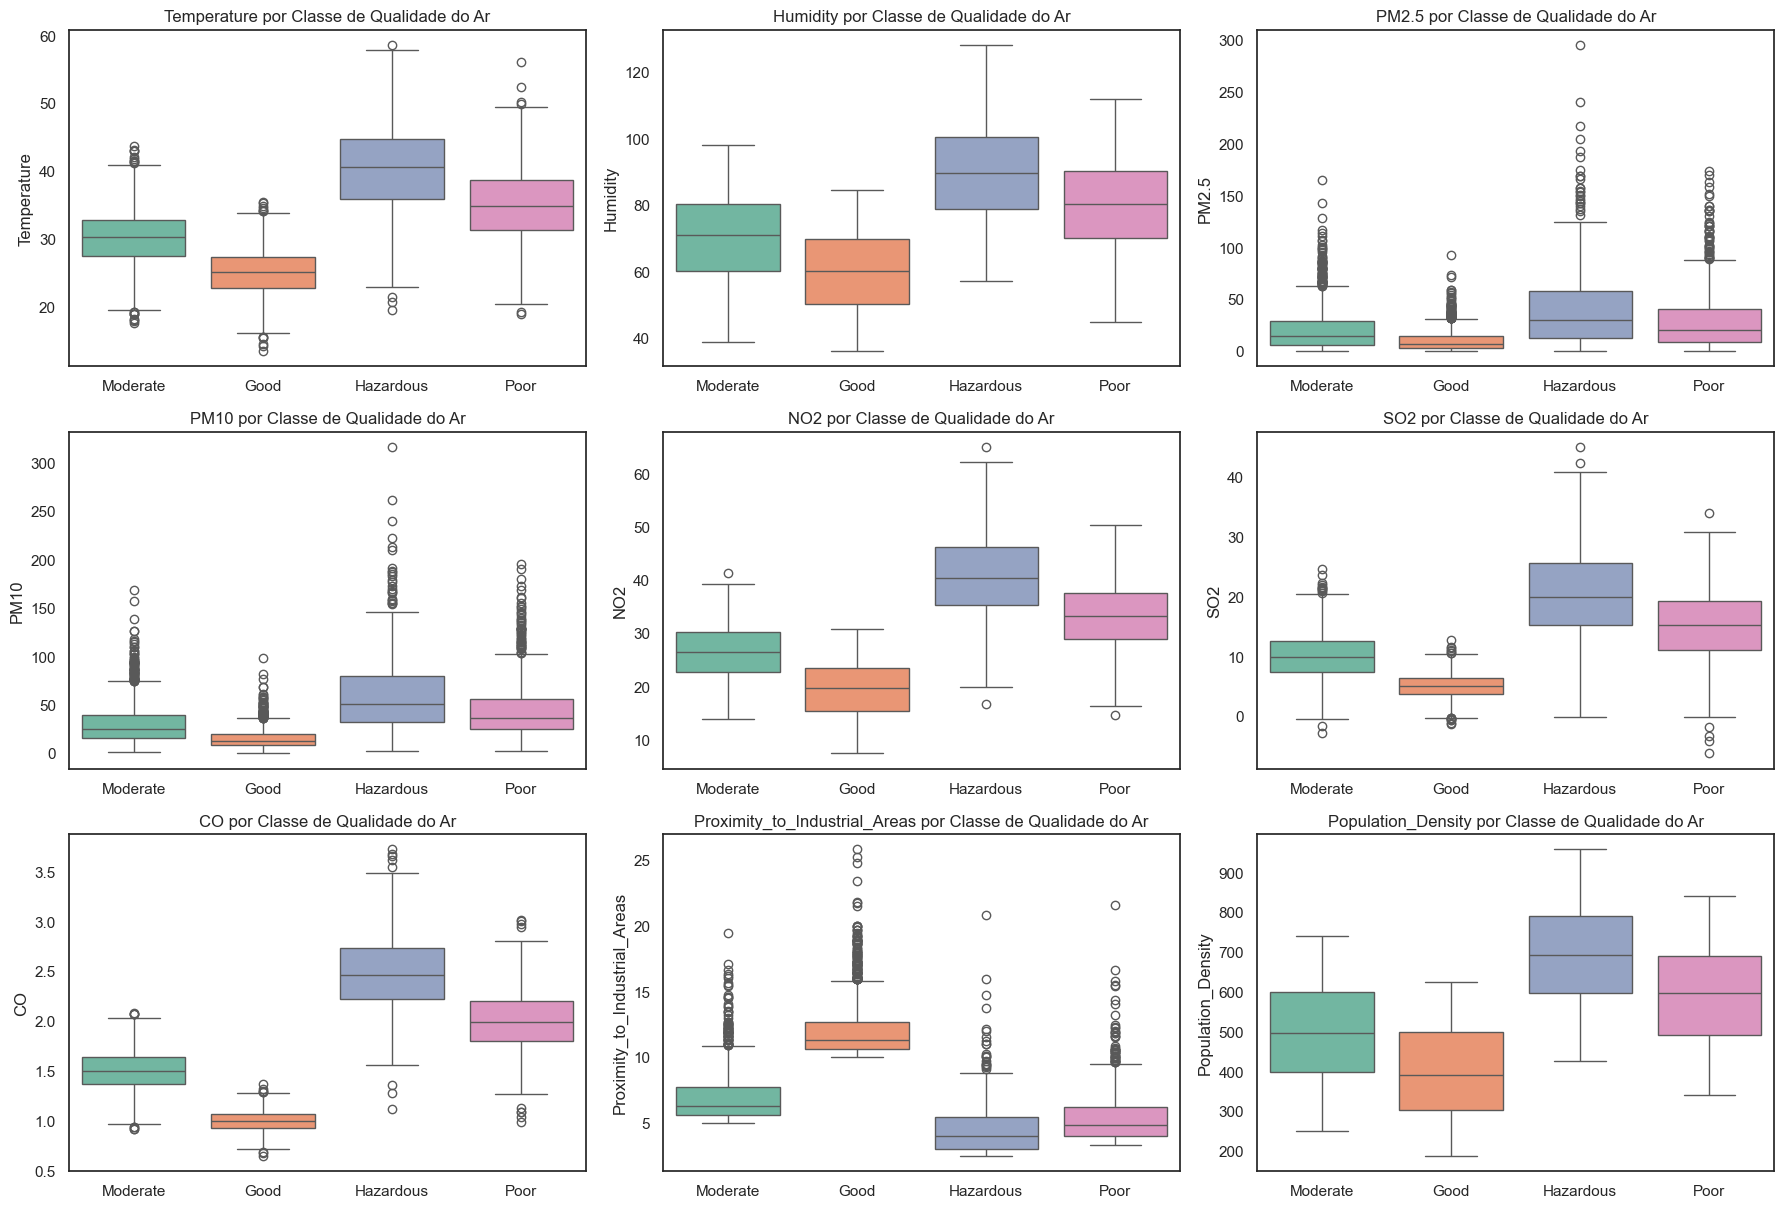

In [23]:
# Boxplots por classe da variável alvo
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))
axes = axes.ravel()
for i, col in enumerate(numeric_cols):
    sns.boxplot(x='Air Quality', y=col, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col} por Classe de Qualidade do Ar')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)
# Ocultar subplots vazios (caso o número não feche certinho)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

### Tratamento do atributo alvo (LabelEncoder)

In [39]:
label_encoder = LabelEncoder()

df['Air Quality Encoded'] = label_encoder.fit_transform(df['Air Quality'])

print("Mapeamento da variável alvo:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label} -> {i}")

Mapeamento da variável alvo:
Good -> 0
Hazardous -> 1
Moderate -> 2
Poor -> 3


In [40]:
df.drop('Air Quality', axis = 1, inplace = True)
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality Encoded
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0


In [41]:
df.to_csv("datasets/updated_pollution_dataset_encoded.csv", index=False)

### Padronização dos dados

In [43]:
std_scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = std_scaler.fit_transform(df_scaled[numeric_cols])
df_scaled.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality Encoded
0,-0.034080,-0.690715,-0.608589,-0.450455,-0.844581,-0.120721,0.402303,-0.588658,-1.168163,2
1,-0.257295,0.349507,-0.726706,-0.658892,0.493329,-0.046643,0.255775,-0.671748,0.743598,2
2,-1.031106,0.292768,0.267100,0.130973,-0.226219,0.383011,0.237459,-0.893318,0.795975,2
3,-0.435867,-1.951591,-0.571933,-0.874642,-1.451700,-0.698530,-0.641707,0.740767,0.350770,0
4,-0.525153,0.040593,-0.539349,-0.519934,-0.507293,-0.654083,-0.898130,1.183909,-1.272917,0


In [44]:
df_scaled.to_csv("datasets/updated_pollution_dataset_scaled.csv", index=False)